<a href="https://www.kaggle.com/code/adamdandi/evaluation-student-competency-achievement-in-smk?scriptVersionId=224034550" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

#  *Student Competency Achievement Evaluation in Vocational High School (SMK)

**Key Initial Information:**

1. **Objectives of the Vocational School Program:** What is the main goal of this program? Is it aimed at increasing employability, providing specific skills, or something else?  
2. **Definition of "Competency":** What competencies are being assessed? Are there specific standards or scoring rubrics?  
3. **Student Score Data:** What does the data format look like? Does it include additional information such as student demographics, vocational majors, etc.?  
4. **Academic Team Expectations:** What does the academic team expect from this analysis? Are there specific questions they want answered?  

**Work Plan (Steps):**

1. **In-Depth Discussion with the Academic Team:** Clarify all the questions above and gather additional information.  
2. **Exploratory Data Analysis (EDA) on Student Scores:** Understand data characteristics, identify initial patterns, and check data quality.  
3. **Competency Achievement Analysis:** Evaluate students' competency achievements based on established standards. Visualize the results with easy-to-read charts (e.g., bar charts, line charts, heatmaps).  
4. **Identify Areas for Further Investigation:** Determine which competencies require further evaluation. Use data to support findings (e.g., competencies with low scores, high variance, or outliers).  
5. **Prepare a Presentation Deck:** Create a concise, informative, and easy-to-understand presentation. Highlight key insights and provide actionable recommendations.  

In [1]:
import pandas as pd
from pandasql import sqldf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load dataset
student_score = pd.read_csv("/kaggle/input/datanya/student_score.csv")

#Define lambda to run query
sql = lambda q:sqldf(q, globals())

#Overview data
print("Student Score Data:")
print(student_score.head(3))

Student Score Data:
   Student ID Competency Name  Competency Score
0        1089     Berkomitmen             100.0
1        1089       Reflektif             100.0
2        1089         Mandiri             100.0


In [2]:
# Dataset Information
print("Student Score Dataset Information:")
print(student_score.info())

Student Score Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Student ID        1575 non-null   int64  
 1   Competency Name   1575 non-null   object 
 2   Competency Score  1575 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 37.0+ KB
None


### **Data Exploration Results**  

#### **Dataset: Student Score** (`student_score.csv`)  
- **Rows x Columns**: 1,575 x 3  
- **Columns**:  
  - `Student ID` (int64) → Unique student ID.  
  - `Competency Name` (object) → Name of the assessed competency.  
  - `Competency Score` (float64) → Competency score (no missing values).  
- **Missing Values**: **0** → Clean dataset with no missing values.  

Unique Students: 254

Competency Statistics:
                 count       mean        std    min      25%     50%     75%  \
Competency Name                                                                
Bekerja sama     122.0  84.555574  16.211088  15.00  76.2275  88.045  98.475   
Berdaya          208.0  86.676106  13.373834  10.00  80.6575  88.810  98.140   
Berkomitmen      157.0  85.233885  13.018190  48.59  76.5600  86.960  96.570   
Berprinsip       137.0  87.599635  12.234818  25.00  81.9600  90.130  97.950   
Cerdas           233.0  85.401288  13.941968  13.33  81.4300  87.650  94.910   
Inovatif         199.0  85.826935  14.234105   6.00  79.7250  89.060  96.180   
Komunikatif      177.0  85.346497  13.839771  30.00  78.4500  88.390  95.780   
Mandiri          201.0  86.556567  12.774268  30.00  81.2500  88.740  95.650   
Reflektif        141.0  84.950567  15.772298  16.00  80.0000  89.090  96.150   

                   max  
Competency Name         
Bekerja sama     100.0  

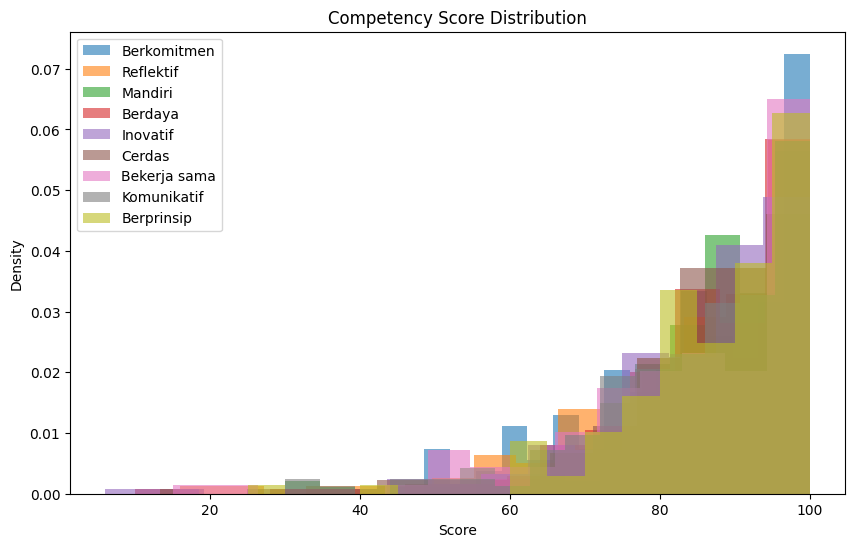

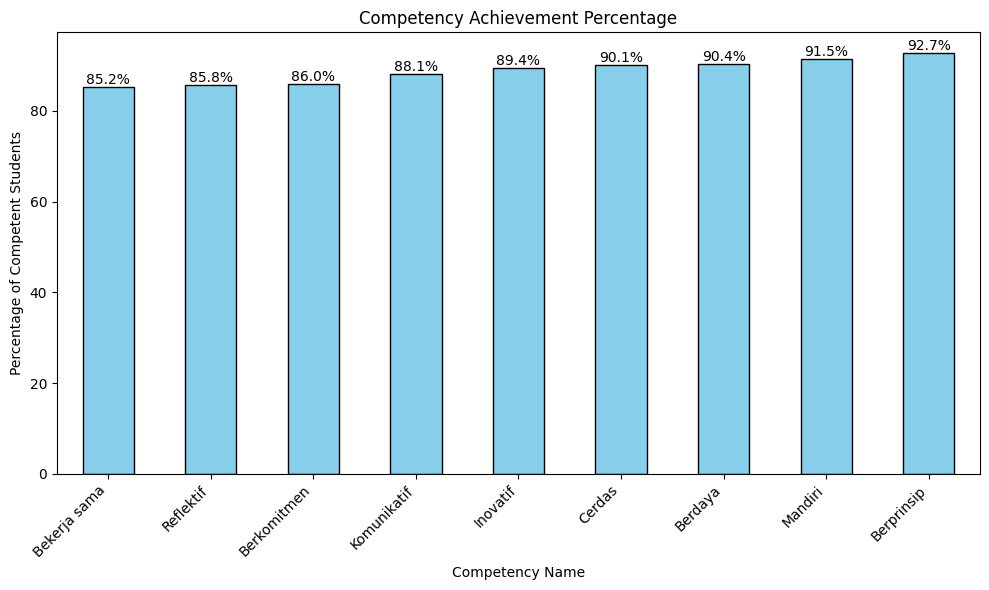

In [3]:
# Step 1: Identify the number of unique students and competency score distribution
unique_students = student_score['Student ID'].nunique()
competency_stats = student_score.groupby('Competency Name')['Competency Score'].describe()

# Step 2: Define competency achievement criteria (score >= 70 is considered competent)
student_score['Competent'] = student_score['Competency Score'] >= 70
competency_achievement = student_score.groupby('Competency Name')['Competent'].mean() * 100

# Print insights
print("Unique Students:", unique_students)
print("\nCompetency Statistics:")
print(competency_stats)
print("\nCompetency Achievement (Percentage):")
print(competency_achievement)

# Step 3: Visualizing Competency Score Distribution
plt.figure(figsize=(10, 6))
for competency in student_score['Competency Name'].unique():
    subset = student_score[student_score['Competency Name'] == competency]
    plt.hist(subset['Competency Score'], alpha=0.6, label=competency, bins=15, density=True)
plt.title("Competency Score Distribution")
plt.xlabel("Score")
plt.ylabel("Density")  # Changed from "Frequency" to "Density"
plt.legend()
plt.show()

# Step 4: Visualizing Competency Achievement Percentage
plt.figure(figsize=(10, 6))
competency_achievement.sort_values().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Competency Achievement Percentage")
plt.xlabel("Competency Name")
plt.ylabel("Percentage of Competent Students")
plt.xticks(rotation=45, ha='right')

# Add data labels to the bars
for i, v in enumerate(competency_achievement.sort_values()):
    plt.text(i, v, f"{v:.1f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()

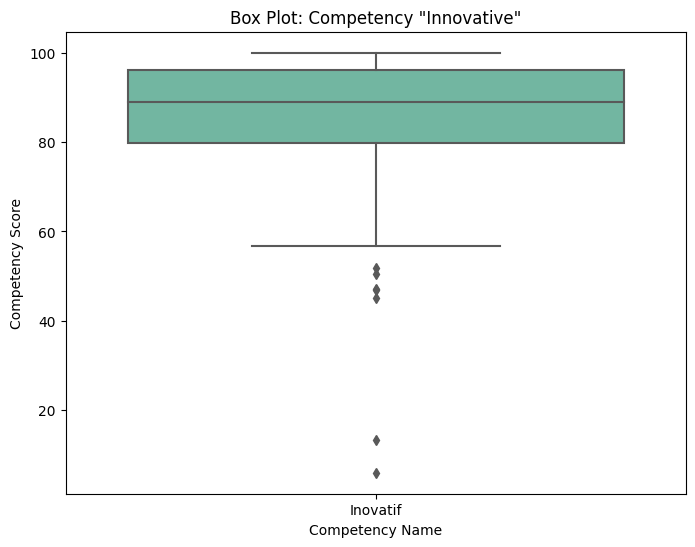

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


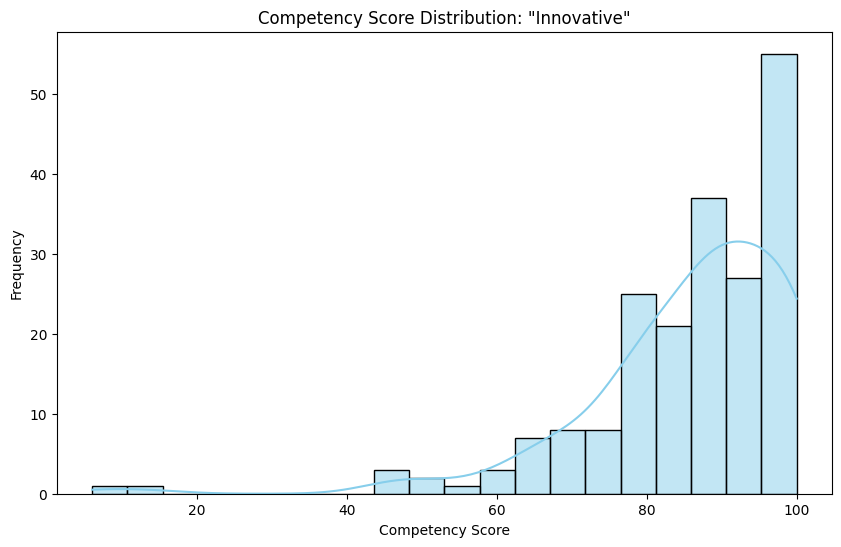

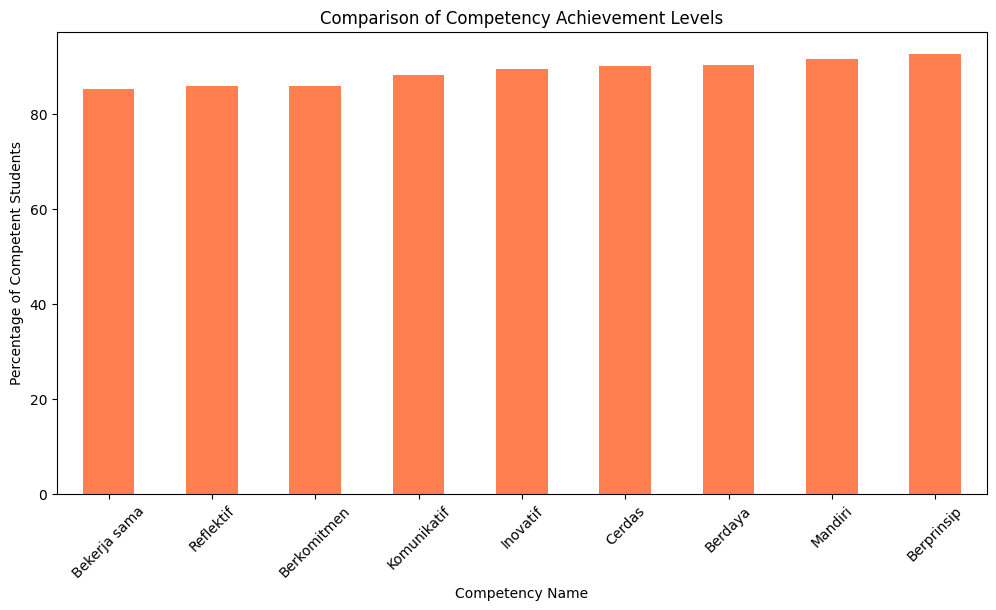

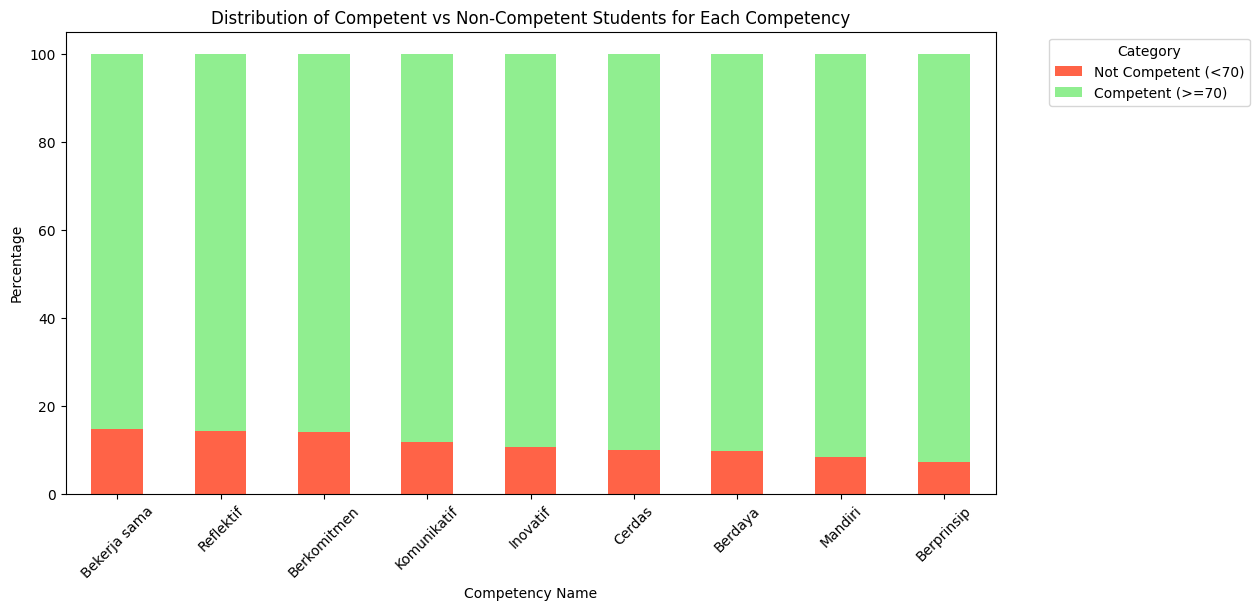

In [4]:
# Step 5.1: Box Plot for "Innovative"
plt.figure(figsize=(8, 6))
sns.boxplot(data=student_score[student_score['Competency Name'] == 'Inovatif'], 
            x='Competency Name', y='Competency Score', palette="Set2")
plt.title('Box Plot: Competency "Innovative"')
plt.ylabel('Competency Score')
plt.xlabel('Competency Name')
plt.savefig("boxplot_innovative.png", format='png', dpi=300)
plt.show()

# Step 5.2: Histogram for "Innovative"
plt.figure(figsize=(10, 6))
sns.histplot(data=student_score[student_score['Competency Name'] == 'Inovatif'], 
             x='Competency Score', bins=20, kde=True, color='skyblue')
plt.title('Competency Score Distribution: "Innovative"')
plt.xlabel('Competency Score')
plt.ylabel('Frequency')
plt.savefig("histogram_innovative.png", format='png', dpi=300)
plt.show()

# Step 6.1: Bar Chart (Comparison of Competency Achievement)
plt.figure(figsize=(12, 6))
competency_achievement.sort_values().plot(kind='bar', color='coral')
plt.title('Comparison of Competency Achievement Levels')
plt.ylabel('Percentage of Competent Students')
plt.xlabel('Competency Name')
plt.xticks(rotation=45)
plt.savefig("bar_chart_competency_achievement.png", format='png', dpi=300, bbox_inches='tight')
plt.show()

# Step 6.2: Stacked Bar Chart (Competent vs Non-Competent for All Competencies)
competency_counts = student_score.groupby('Competency Name')['Competent'].value_counts(normalize=True).unstack() * 100
competency_counts = competency_counts.sort_values(by=True, ascending=True)  # Sort by 'True' (Competent) values
competency_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=['tomato', 'lightgreen'])
plt.title('Distribution of Competent vs Non-Competent Students for Each Competency')
plt.ylabel('Percentage')
plt.xlabel('Competency Name')
plt.legend(['Not Competent (<70)', 'Competent (>=70)'], title='Category', 
           bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.xticks(rotation=45)

# Save the chart with bbox_inches='tight' to ensure the image is not cut off
plt.savefig("stacked_bar_chart_competency.png", format='png', dpi=300, bbox_inches='tight')
plt.show()

## **Key Findings**
- **Highest Variance in "Inovatif" Competency:** 
  - Standard deviation: **14.23**, indicating a wide variation in scores.
  - Minimum score: **6.0**, significantly lower than other competencies.
  - Suggests inconsistency in how students grasp the material.

- **Lowest Competency Achievement: "Bekerja Sama" & "Reflektif"** 
  - **Bekerja Sama:** **85.25%** competency rate.
  - **Reflektif:** **85.82%** competency rate.
  - These areas require additional support and instructional improvements.

## **Recommendations**
#### **A. Differentiated Learning Approach**
- Identify students with **low scores in "Inovatif" competency** and provide additional support.
- Implement **personalized coaching** or **peer-assisted learning** to address learning gaps.

#### **B. Teaching Method Improvement**
- **Re-evaluate the content** for the "Inovatif" competency:
  - Ensure the material is **clear, practical, and engaging** for students.
  - Consider integrating **project-based learning** to foster creativity.
- Investigate whether **teaching methods for "Bekerja Sama" and "Reflektif"** are effective.

#### **C. Regular Monitoring & Feedback**
- Establish a **systematic performance monitoring program** to track student progress.
- Provide **individualized feedback** to help students understand their weaknesses and strengths.
- Conduct **regular assessments** to evaluate the impact of interventions.

#### **D. Curriculum Development Based on Data**
- Use this competency analysis to **enhance the vocational curriculum**.
- Align learning materials with **industry needs and real-world applications**.
- Introduce **adaptive learning strategies** based on student performance trends.

## **Conclusion**
While **most competencies have an achievement rate above 85%**, certain areas require focused improvements. The **high variance in "Inovatif" competency** suggests the need for better instructional strategies, while the **low competency rates in "Bekerja Sama" and "Reflektif"** call for targeted interventions. Implementing **differentiated learning, curriculum enhancements, and continuous monitoring** will help improve overall student competency achievement.